In [1]:
#!/usr/bin/env python
# coding: utf-8
'''
construct model for points cloud input based on XG-Boost
'''

import sys
root_dir = '../../'
sys.path.append(root_dir)
sys.path.append(root_dir + 'Data/corner/scripts')

import os
import psutil
import matplotlib
# matplotlib.use('agg') # so that plt works in command line
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import Data_Feeder as feeder
import Metric_Recorder as recorder
import Model_Constructer as constructer

from optparse import OptionParser

In [2]:
data_path = root_dir + 'Data/corner/dw_19991231_162610_0.000000_0.000000/'
class_num = 2
line_re = '\t (?!3).*' # only corner radar
select_cols = [2,3,4,5,6,7,8,9] # all cols

dataset = feeder.Corner_Radar_Points_Gen_Feeder(data_path, 
                                                class_num=class_num, 
                                                use_onehot=False, 
                                                line_re=line_re, 
                                                select_cols=select_cols)
points, labels = dataset.get_all_data(allowed=True)
points = np.vstack(points)
labels = np.concatenate(labels)

print(dataset.feature_names)

['x', 'y', 'angle', 'distance', 'speed', 'rcs', 'v_x', 'v_y']


In [3]:
print(points.shape, labels.shape)
print(points[1000:].shape, labels[1000:].shape)

(698782, 8) (698782,)
(697782, 8) (697782,)


In [4]:
dtrain = xgb.DMatrix(points[100000:], label=labels[100000:], feature_names=dataset.feature_names)
dval = xgb.DMatrix(points[:100000], label=labels[:100000], feature_names=dataset.feature_names)

In [5]:
param = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',# 'multi:softmax' for multi-class
#     'gamma': 0.1,                  # if post-pruning, the larger the more conservative (usually 0.1, 0.2)
#     'max_depth': 12,               # depth of tree, the larger the easier to overfit
#     'lambda': 2,                   # for L2 normalization
#     'subsample': 0.7,              # random sample for training
#     'colsample_bytree': 0.7,       # subsample in cols when generating the tree
    'silent': 1,                   # if silent (0 for verbose)
#     'eta': 0.007,                  # learning rate
    'nthread': 4,                  # cpu threads
    'eval_metric': ['error', 'auc', 'aucpr', 'map']
}
evallist = [(dval, 'eval'), (dtrain, 'train')]

In [6]:
num_round = 300
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-error:0.0274	eval-auc:0.887211	eval-aucpr:0.700174	eval-map:0.700848	train-error:0.02203	train-auc:0.889854	train-aucpr:0.712784	train-map:0.710732
[1]	eval-error:0.02487	eval-auc:0.933148	eval-aucpr:0.730475	eval-map:0.731024	train-error:0.021312	train-auc:0.934549	train-aucpr:0.738441	train-map:0.738434
[2]	eval-error:0.02439	eval-auc:0.939668	eval-aucpr:0.745134	eval-map:0.745838	train-error:0.020831	train-auc:0.941177	train-aucpr:0.756386	train-map:0.755498
[3]	eval-error:0.02381	eval-auc:0.981261	eval-aucpr:0.812548	eval-map:0.8127	train-error:0.020305	train-auc:0.985614	train-aucpr:0.830453	train-map:0.829112
[4]	eval-error:0.0234	eval-auc:0.983747	eval-aucpr:0.822741	eval-map:0.822178	train-error:0.0198	train-auc:0.98769	train-aucpr:0.844645	train-map:0.845518
[5]	eval-error:0.02308	eval-auc:0.984812	eval-aucpr:0.827991	eval-map:0.827667	train-error:0.019338	train-auc:0.988312	train-aucpr:0.849852	train-map:0.850067
[6]	eval-error:0.02283	eval-auc:0.985772	eval-aucpr:0.

[52]	eval-error:0.01861	eval-auc:0.99371	eval-aucpr:0.882101	eval-map:0.882116	train-error:0.013015	train-auc:0.996472	train-aucpr:0.923317	train-map:0.923321
[53]	eval-error:0.01849	eval-auc:0.993746	eval-aucpr:0.88255	eval-map:0.882566	train-error:0.012916	train-auc:0.996515	train-aucpr:0.924283	train-map:0.924289
[54]	eval-error:0.01821	eval-auc:0.993817	eval-aucpr:0.883992	eval-map:0.884007	train-error:0.012783	train-auc:0.996584	train-aucpr:0.925714	train-map:0.925718
[55]	eval-error:0.01809	eval-auc:0.993836	eval-aucpr:0.884267	eval-map:0.884282	train-error:0.012719	train-auc:0.996636	train-aucpr:0.926665	train-map:0.926668
[56]	eval-error:0.01811	eval-auc:0.993832	eval-aucpr:0.884211	eval-map:0.884226	train-error:0.012707	train-auc:0.996653	train-aucpr:0.92691	train-map:0.926914
[57]	eval-error:0.01807	eval-auc:0.993918	eval-aucpr:0.885782	eval-map:0.885797	train-error:0.012544	train-auc:0.996711	train-aucpr:0.928345	train-map:0.928347
[58]	eval-error:0.01802	eval-auc:0.993941	e

[104]	eval-error:0.01761	eval-auc:0.994238	eval-aucpr:0.889663	eval-map:0.889679	train-error:0.010663	train-auc:0.997583	train-aucpr:0.946742	train-map:0.946744
[105]	eval-error:0.01762	eval-auc:0.994231	eval-aucpr:0.889637	eval-map:0.889654	train-error:0.010655	train-auc:0.997586	train-aucpr:0.946811	train-map:0.946812
[106]	eval-error:0.0176	eval-auc:0.994234	eval-aucpr:0.889922	eval-map:0.889938	train-error:0.010588	train-auc:0.997601	train-aucpr:0.947227	train-map:0.947228
[107]	eval-error:0.01759	eval-auc:0.994233	eval-aucpr:0.890044	eval-map:0.89006	train-error:0.010486	train-auc:0.997628	train-aucpr:0.947899	train-map:0.9479
[108]	eval-error:0.01766	eval-auc:0.994252	eval-aucpr:0.890263	eval-map:0.890279	train-error:0.010446	train-auc:0.997644	train-aucpr:0.948153	train-map:0.948155
[109]	eval-error:0.01764	eval-auc:0.994251	eval-aucpr:0.89025	eval-map:0.890266	train-error:0.010416	train-auc:0.997658	train-aucpr:0.948421	train-map:0.948423
[110]	eval-error:0.01763	eval-auc:0.994

[156]	eval-error:0.01773	eval-auc:0.994325	eval-aucpr:0.893238	eval-map:0.893253	train-error:0.00898	train-auc:0.99821	train-aucpr:0.960732	train-map:0.960733
[157]	eval-error:0.01777	eval-auc:0.994317	eval-aucpr:0.892968	eval-map:0.892983	train-error:0.008955	train-auc:0.998223	train-aucpr:0.961091	train-map:0.961092
[158]	eval-error:0.01781	eval-auc:0.994324	eval-aucpr:0.893119	eval-map:0.893134	train-error:0.008921	train-auc:0.998237	train-aucpr:0.961435	train-map:0.961436
[159]	eval-error:0.01784	eval-auc:0.994328	eval-aucpr:0.892984	eval-map:0.892999	train-error:0.008861	train-auc:0.99826	train-aucpr:0.961931	train-map:0.961932
[160]	eval-error:0.01783	eval-auc:0.99433	eval-aucpr:0.893008	eval-map:0.893024	train-error:0.008861	train-auc:0.998264	train-aucpr:0.961999	train-map:0.962
[161]	eval-error:0.01785	eval-auc:0.994317	eval-aucpr:0.892767	eval-map:0.892782	train-error:0.008816	train-auc:0.998276	train-aucpr:0.962239	train-map:0.96224
[162]	eval-error:0.01785	eval-auc:0.994317

[208]	eval-error:0.01765	eval-auc:0.994391	eval-aucpr:0.893533	eval-map:0.893549	train-error:0.007721	train-auc:0.998636	train-aucpr:0.970189	train-map:0.97019
[209]	eval-error:0.01767	eval-auc:0.994387	eval-aucpr:0.893489	eval-map:0.893504	train-error:0.007706	train-auc:0.998641	train-aucpr:0.970272	train-map:0.970273
[210]	eval-error:0.01769	eval-auc:0.994388	eval-aucpr:0.893496	eval-map:0.893512	train-error:0.007699	train-auc:0.998643	train-aucpr:0.970302	train-map:0.970303
[211]	eval-error:0.0177	eval-auc:0.994389	eval-aucpr:0.893559	eval-map:0.893575	train-error:0.007671	train-auc:0.99865	train-aucpr:0.970486	train-map:0.970487
[212]	eval-error:0.01773	eval-auc:0.994389	eval-aucpr:0.893628	eval-map:0.893644	train-error:0.007654	train-auc:0.99866	train-aucpr:0.970683	train-map:0.970684
[213]	eval-error:0.01773	eval-auc:0.994386	eval-aucpr:0.893586	eval-map:0.893601	train-error:0.007641	train-auc:0.998666	train-aucpr:0.970849	train-map:0.97085
[214]	eval-error:0.01771	eval-auc:0.994

[260]	eval-error:0.01775	eval-auc:0.994404	eval-aucpr:0.893184	eval-map:0.893199	train-error:0.006946	train-auc:0.998893	train-aucpr:0.975643	train-map:0.975643
[261]	eval-error:0.01777	eval-auc:0.994408	eval-aucpr:0.893251	eval-map:0.893266	train-error:0.006929	train-auc:0.998897	train-aucpr:0.975719	train-map:0.97572
[262]	eval-error:0.01778	eval-auc:0.994411	eval-aucpr:0.893276	eval-map:0.893292	train-error:0.006902	train-auc:0.998903	train-aucpr:0.97586	train-map:0.97586
[263]	eval-error:0.0178	eval-auc:0.994416	eval-aucpr:0.893298	eval-map:0.893314	train-error:0.006887	train-auc:0.998908	train-aucpr:0.975929	train-map:0.975929
[264]	eval-error:0.0178	eval-auc:0.994406	eval-aucpr:0.893398	eval-map:0.893413	train-error:0.006849	train-auc:0.998915	train-aucpr:0.976101	train-map:0.976101
[265]	eval-error:0.01779	eval-auc:0.99441	eval-aucpr:0.893419	eval-map:0.893434	train-error:0.006827	train-auc:0.998922	train-aucpr:0.976223	train-map:0.976224
[266]	eval-error:0.01781	eval-auc:0.9944

In [13]:
bst.predict(dval)

array([4.5617249e-02, 1.0837254e-02, 7.7990117e-03, ..., 5.8117574e-01,
       4.2804336e-04, 1.8341560e-06], dtype=float32)

In [7]:
save_dir = './Model/'
model_name = 'xgb'
bst.dump_model('xgb.txt')

[2, 3, 4, 5, 6, 7, 8, 9] 
 ['x', 'y', 'angle', 'distance', 'speed', 'rcs', 'v_x', 'v_y']


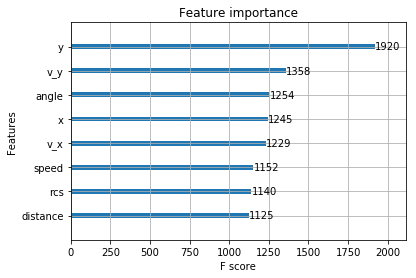

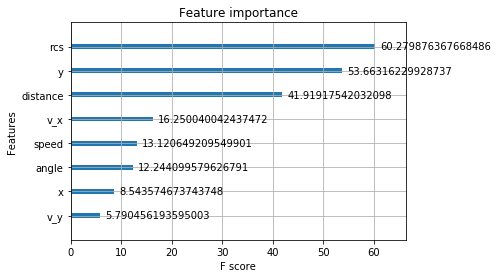

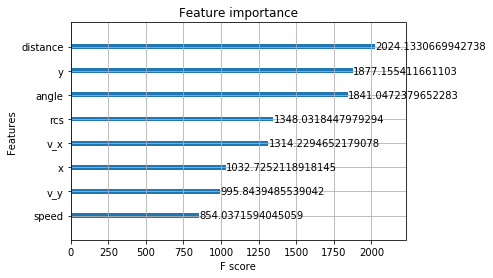

In [14]:
for importance_type in ['weight', 'gain', 'cover']:
    xgb.plot_importance(bst, importance_type=importance_type)
print(select_cols, '\n', dataset.feature_names)

In [12]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(300,300))
xgb.plot_tree(bst, ax=ax)
fig.savefig('xgb.png', bbox_inches='tight')
plt.close()

In [ ]:
for i, feat in enumerate(['1', '2', '234', '456']):
        print('{0}\t{1}\tq\n'.format(i, feat))

In [ ]:
feat_importances = []
for ft, score in bst.get_fscore().iteritems():
    feat_importances.append({'Feature': ft, 'Importance': score})

In [ ]:
bst.get_fscore()